In [10]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [34]:
# generate features
N = 1000
feat1 = np.random.normal(loc=0., scale=1., size=(N,))
feat2 = feat1 + np.random.normal(loc=0., scale=3., size=(N,))
feat3 = 2 * feat1 + feat2
feat = np.array((feat1, feat2, feat3))

# covariance
cov = np.cov(feat)

# eigendecomposition (sorted to match SVD)
l, V = la.eig(cov)
index = np.argsort(l)[::-1]
l = l[index]
V = V[:, index]

# SVD
U, S, Vt = la.svd(feat)
l_svd = S**2/(N-1)
V_svd = U

# print eigenvalues and eigenvectors
print('Covariance matrix:\n', cov, '\n')
print('---------------EIGENDECOMPOSITION---------------')
print('Eigenvalues:\n', l)
print('Real part of eigenvalues:\n', np.real_if_close(l))
print('Eigenvectors:\n', V)
print('\n-----------------------SVD-----------------------')
print('Eigenvalues:\n', l_svd)
print('Eigenvectors:\n', V_svd, '\n')

# check the precision within the two results are equal
diff_l = abs(l-l_svd)
diff_V = abs(V-V_svd)
print("The eigenvalues match for a precision of E%d" %np.floor(np.log10(np.max(diff_l))))
print("The eigenvectors' components match for a precision of E%d" %np.floor(np.log10(np.max(diff_V))))

# otherwise one could check if the the results match with:
# np.allclose(l, l_svd, precision)
# and set the desired precision

Covariance matrix:
 [[ 0.95915482  1.00621251  2.92452215]
 [ 1.00621251  9.91633757 11.92876259]
 [ 2.92452215 11.92876259 17.77780688]] 

---------------EIGENDECOMPOSITION---------------
Eigenvalues:
 [2.67467887e+01+0.j 1.90651059e+00+0.j 1.40126013e-15+0.j]
Real part of eigenvalues:
 [2.67467887e+01 1.90651059e+00 1.40126013e-15]
Eigenvectors:
 [[-0.11414593  0.5659541  -0.81649658]
 [-0.57900344 -0.70575374 -0.40824829]
 [-0.80729531  0.42615445  0.40824829]]

-----------------------SVD-----------------------
Eigenvalues:
 [2.67714291e+01 1.91077457e+00 6.90864397e-30]
Eigenvectors:
 [[-0.11391248  0.56600113 -0.81649658]
 [-0.5792945  -0.70551486 -0.40824829]
 [-0.80711946  0.4264874   0.40824829]] 

The eigenvalues match for a precision of E-2
The eigenvectors' components match for a precision of E-4


In [12]:
# PCA analysis
Lambda = np.diag(np.real_if_close(l))
print("Lambda:\n", Lambda, '\n')

print("Selecting the component 0, we retain %.2f%% of the total variability" % (100*np.real(Lambda[0,0])/np.real(Lambda.trace())))
print("Selecting the component 1, we retain %.2f%% of the total variability" % (100*np.real(Lambda[1,1])/np.real(Lambda.trace())))
print("Selecting the component 2, we retain %.2f%% of the total variability" % np.abs((100*np.real(Lambda[2,2])/np.real(Lambda.trace()))))
print("Selecting the component 0 and 1, we retain %.2f%% of the total variability" % (100*(np.real(Lambda[0,0])+np.real(Lambda[1,1]))/np.real(Lambda.trace())))
print("Selecting the component 0 and 2, we retain %.2f%% of the total variability" % (100*(np.real(Lambda[0,0])+np.real(Lambda[2,2]))/np.real(Lambda.trace())))
print("Selecting the component 1 and 2, we retain %.2f%% of the total variability" % (100*(np.real(Lambda[1,1])+np.real(Lambda[2,2]))/np.real(Lambda.trace())))

print("\nGiven how the dataset was constructed the PCA make sense, since feature 3 was built out of feature 1 and 2, therefore it doesn't retain any variability.")

Lambda:
 [[ 2.65786094e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.94432460e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.29301871e-17]] 

Selecting the component 0, we retain 93.18% of the total variability
Selecting the component 1, we retain 6.82% of the total variability
Selecting the component 2, we retain 0.00% of the total variability
Selecting the component 0 and 1, we retain 100.00% of the total variability
Selecting the component 0 and 2, we retain 93.18% of the total variability
Selecting the component 1 and 2, we retain 6.82% of the total variability

Given how the dataset was constructed the PCA make sense, since feature 3 was built out of feature 1 and 2, therefore it doesn't retain any variability.


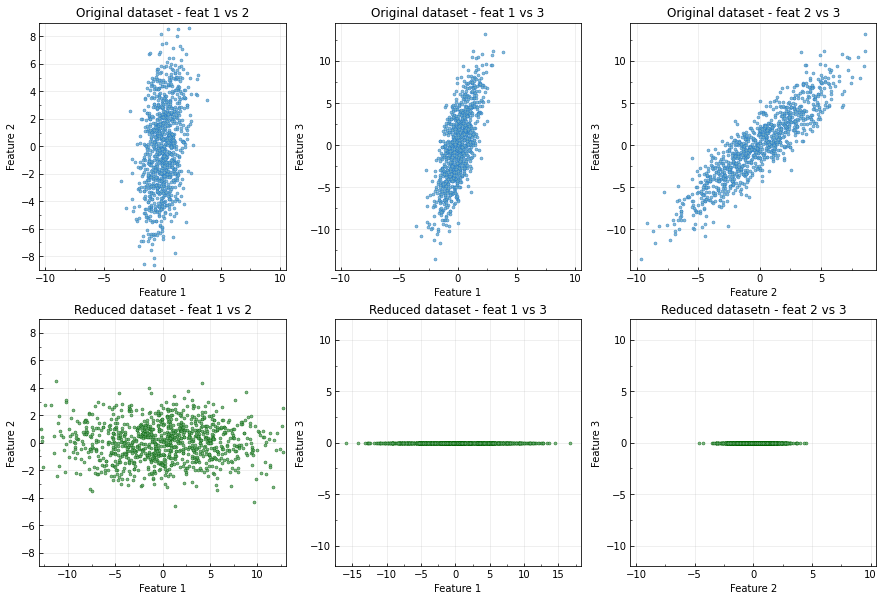

In [35]:
# rotate and reduce data
feat_rotated = np.dot(V.T, feat)
feat_reduced = np.array((feat_rotated[0], feat_rotated[1]))

#plot data
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax[0,0].scatter(feat[0], feat[1], marker='.', color='#75aebf', edgecolor='#1874cd', alpha=0.8, lw=0.5)
ax[0,0].set_title('Original dataset - feat 1 vs 2')
ax[0,0].set_xlabel('Feature 1')
ax[0,0].set_ylabel('Feature 2')
ax[0,0].set_xlim(-10.5, 10.5)
ax[0,0].set_ylim(-9, 9)
ax[0,0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0,0].tick_params(which='both', direction='in')
ax[0,0].grid(which='major', axis='both', alpha=0.25)
ax[0,0].set_axisbelow(True)

ax[0,1].scatter(feat[0], feat[2], marker='.', color='#75aebf', edgecolor='#1874cd', alpha=0.8, lw=0.5)
ax[0,1].set_title('Original dataset - feat 1 vs 3')
ax[0,1].set_xlabel('Feature 1')
ax[0,1].set_ylabel('Feature 3')
ax[0,1].set_xlim(-10.5, 10.5)
ax[0,1].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0,1].tick_params(which='both', direction='in')
ax[0,1].grid(which='major', axis='both', alpha=0.25)
ax[0,1].set_axisbelow(True)

ax[0,2].scatter(feat[1], feat[2], marker='.', color='#75aebf', edgecolor='#1874cd', alpha=0.8, lw=0.5)
ax[0,2].set_title('Original dataset - feat 2 vs 3')
ax[0,2].set_xlabel('Feature 2')
ax[0,2].set_ylabel('Feature 3')
ax[0,2].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0,2].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0,2].tick_params(which='both', direction='in')
ax[0,2].grid(which='major', axis='both', alpha=0.25)
ax[0,2].set_axisbelow(True)

ax[1,0].scatter(feat_rotated[0], feat_rotated[1], marker='.', color='#62a36d', edgecolor='darkgreen', alpha=0.8, lw=0.5)
ax[1,0].set_title('Reduced dataset - feat 1 vs 2')
ax[1,0].set_xlabel('Feature 1')
ax[1,0].set_ylabel('Feature 2')
ax[1,0].set_xlim(-13, 13)
ax[1,0].set_ylim(-9, 9)
ax[1,0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1,0].tick_params(which='both', direction='in')
ax[1,0].grid(which='major', axis='both', alpha=0.25)
ax[1,0].set_axisbelow(True)

ax[1,1].scatter(feat_rotated[0], feat_rotated[2], marker='.', color='#62a36d', edgecolor='darkgreen', alpha=0.8, lw=0.5)
ax[1,1].set_title('Reduced dataset - feat 1 vs 3')
ax[1,1].set_xlabel('Feature 1')
ax[1,1].set_ylabel('Feature 3')
ax[1,1].set_ylim(-12, 12)
ax[1,1].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1,1].tick_params(which='both', direction='in')
ax[1,1].grid(which='major', axis='both', alpha=0.25)
ax[1,1].set_axisbelow(True)

ax[1,2].scatter(feat_rotated[1], feat_rotated[2], marker='.', color='#62a36d', edgecolor='darkgreen', alpha=0.8, lw=0.5)
ax[1,2].set_title('Reduced datasetn - feat 2 vs 3')
ax[1,2].set_xlabel('Feature 2')
ax[1,2].set_ylabel('Feature 3')
ax[1,2].set_xlim(-10.5, 10.5)
ax[1,2].set_ylim(-12, 12)
ax[1,2].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1,2].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1,2].tick_params(which='both', direction='in')
ax[1,2].grid(which='major', axis='both', alpha=0.25)
ax[1,2].set_axisbelow(True)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [14]:
# generate random locations and scales for the noise
scales = np.random.uniform(1/30, 5/30, 10) 
locs  = np.random.uniform(-1, 1, 10)
# generate and add the noise
noise = np.array( [np.random.normal(loc, scale, N)  for loc, scale in zip(locs, scales)] )
nD = np.concatenate((feat, noise))

# covariance matrix and PCA analysis
cov = np.cov(nD)
l, V = la.eig(cov)
Lambda = np.diag(np.real_if_close(l))

print("Selecting the component 0, we retain %.2f%% of the total variability" % (100*np.real(Lambda[0,0])/np.real(Lambda.trace())))
print("Selecting the component 1, we retain %.2f%% of the total variability" % (100*np.real(Lambda[1,1])/np.real(Lambda.trace())))
print("Selecting the component 2, we retain %.2f%% of the total variability" % (100*np.real(Lambda[2,2])/np.real(Lambda.trace())))
print("Selecting the component 0 and 1, we retain %.2f%% of the total variability" % (100*(np.real(Lambda[0,0])+np.real(Lambda[1,1]))/np.real(Lambda.trace())))
print("Selecting the component 0 and 2, we retain %.2f%% of the total variability" % (100*(np.real(Lambda[0,0])+np.real(Lambda[2,2]))/np.real(Lambda.trace())))
print("Selecting the component 1 and 2, we retain %.2f%% of the total variability" % (100*(np.real(Lambda[1,1])+np.real(Lambda[2,2]))/np.real(Lambda.trace())))

print("\nThe results is the same as before, the component 0 retains most of the variability (>90%)")
print("Adding also component 1 we get almost 100%")

Selecting the component 0, we retain 92.88% of the total variability
Selecting the component 1, we retain 6.80% of the total variability
Selecting the component 2, we retain 0.08% of the total variability
Selecting the component 0 and 1, we retain 99.68% of the total variability
Selecting the component 0 and 2, we retain 92.96% of the total variability
Selecting the component 1 and 2, we retain 6.87% of the total variability

The results is the same as before, the component 0 retains most of the variability (>90%)
Adding also component 1 we get almost 100%


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [15]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [16]:
# get data
df_raw = pd.read_csv("./data/magic04.data", index_col = False)
labels = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df_raw.columns = labels
df_raw

# since class 'g'=gamma and 'h'=hadron (background), we filter the dataframe to retain only 'g'-class information
df = df_raw[df_raw['class']=='g']
df = df.drop(['class'], axis=1)

ncol = df.shape[1]
nrow = df.shape[0]

# reshape
data = df.to_numpy().reshape(ncol, nrow)

In [17]:
# PCA analysis
cov = np.cov(data)
l, V = la.eig(cov)

Lambda = np.diag(np.real_if_close(l))

variability = 0
for i in range(1, ncol+1):
    variability += Lambda[i-1,i-1]/np.trace(Lambda)
    if variability > 0.9:
        print("PCA with k=%d has variability >90%% (precise value:%.2f%%)"%(i, 100*variability))
    else:
        print("PCA with k=%d has variability <90%% (precise value:%.2f%%)"%(i, 100*variability))

print("\nPCA failed since we could get more than 90% of variability with k=10")

PCA with k=1 has variability <90% (precise value:2.31%)
PCA with k=2 has variability <90% (precise value:19.07%)
PCA with k=3 has variability <90% (precise value:35.57%)
PCA with k=4 has variability <90% (precise value:42.12%)
PCA with k=5 has variability <90% (precise value:50.14%)
PCA with k=6 has variability <90% (precise value:58.08%)
PCA with k=7 has variability <90% (precise value:69.13%)
PCA with k=8 has variability <90% (precise value:80.03%)
PCA with k=9 has variability <90% (precise value:89.99%)
PCA with k=10 has variability >90% (precise value:100.00%)

PCA failed since we could get more than 90% of variability with k=10
